# CS3237 Lab 3 Introduction to Deep Learning

<br>
<center> Lab Group: B2 </center>

| Student Number: | Name:                   |
|:----------------|:------------------------|
| A0184893L       | Ng Wei Jie, Brandon              |
| A7654321Z       | Tan Chin Koo            |

## 1. Introduction

We will achieve the following objectives in this lab:

    1. An understanding of the practical limitations of using dense networks in complex tasks
    2. Hands-on experience in building a deep learning neural network to solve a relatively complex task.
    
As this lab is more challenging than the previous labs, please work in teams of two persons. Please use the respective categories in the LumiNUS Forum under the "Labs" Heading to find a partner within your own group.

Each step may take a long time to run. You and your partner may want to work out how to do things simultaneously, but please do not miss out on any learning opportunities.


## 2. Submission Instructions

This lab is to be done in teams of 2, with each team submitting one copy to  to the group's respective submission folder in the Lab 3 Submissions folder. The file should be called \<AxxxxxxY\>.ipynb where \<AxxxxxxY\> is the student number of the team leader.

**Group B1 (Tuesdays 2 pm to 4 pm) should submit by Friday 18 September 11.59 pm, and Group B2 (Fridays 12 pm to 2 pm) should submit by Monday 21 September 11.59 pm.**

## 3. Creating a Dense Network for CIFAR-10

We will now begin building a neural network for the CIFAR-10 dataset. The CIFAR-10 dataset consists of 50,000 32x32x3 (32x32 pixels, RGB channels) training images and 10,000 testing images (also 32x32x3), divided into the following 10 categories:

    1. Airplane
    2. Automobile
    3. Bird
    4. Cat
    5. Deer
    6. Dog
    7. Frog
    8. Horse
    9. Ship
    10. Truck
    
In the first two parts of this lab we will create a classifier for the CIFAR-10 dataset.

### 3.1 Loading the Dataset

We begin firstly by creating a Dense neural network for CIFAR-10. The code below shows how we load the CIFAR-10 dataset:


In [1]:
from keras.utils import to_categorical
from keras.datasets import *
import numpy as np
from matplotlib import pyplot as plt
from keras.optimizers import *
from keras.models import Sequential, load_model
from keras.layers import *
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
import os
import shutil

np.random.seed(24601)

def plot_history(history):
    #  "Accuracy"
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [2]:
def load_cifar10():
    (train_x, train_y), (test_x, test_y) = cifar10.load_data()
    train_x = train_x.reshape(train_x.shape[0], 3072) # Question 1
    test_x = test_x.reshape(test_x.shape[0], 3072) # Question 1
    train_x = train_x.astype('float32')
    test_x = test_x.astype('float32')
    train_x /= 255.0
    test_x /= 255.0
    ret_train_y = to_categorical(train_y,10)
    ret_test_y = to_categorical(test_y, 10)
    
    return (train_x, ret_train_y), (test_x, ret_test_y)


(train_x, train_y), (test_x, test_y) = load_cifar10()

----

#### Question 1

Explain what the following two  statements do, and where the number "3072" came from (2 MARKS):

```
  train_x = train_x.reshape(train_x.shape[0], 3072) # Question 1
  test_x = test_x.reshape(test_x.shape[0], 3072) # Question 1
```

**ANSWER: The RGB image has dimensions (32, 32, 3). The reshape method flattens the image so that each observation has 32 * 32 * 3 = 3072 number of features.**

*FOR GRADER: _______ / 2*

### 3.2 Building the MLP Classifier

In the code box below, create a new fully connected (dense) multilayer perceptron classifier for the CIFAR-10 dataset. To begin with, create a network with one hidden layer of 1024 neurons, using the SGD optimizer. You should output the training and validation accuracy at every epoch, and train for 50 epochs:


Epoch 1/50
1563/1563 [==============================] - 15s 10ms/step - loss: 2.0352 - accuracy: 0.2824 - val_loss: 1.9254 - val_accuracy: 0.3229
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.8775 - accuracy: 0.3486 - val_loss: 1.8506 - val_accuracy: 0.3563
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8217 - accuracy: 0.3693 - val_loss: 1.8095 - val_accuracy: 0.3730
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7868 - accuracy: 0.3827 - val_loss: 1.7749 - val_accuracy: 0.3851
Epoch 5/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.7595 - accuracy: 0.3916 - val_loss: 1.7590 - val_accuracy: 0.3885
Epoch 6/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.7370 - accuracy: 0.4008 - val_loss: 1.7285 - val_accuracy: 0.4018
Epoch 7/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.7172 - accuracy: 0.4098 - val_loss: 1.7192 - val

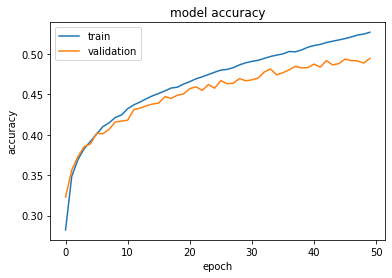

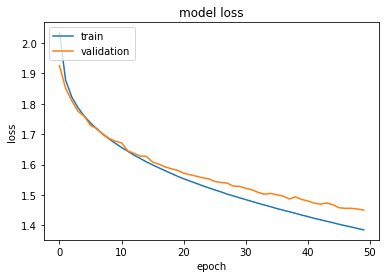

Learning Rate:  0.001
Training Accuracy:  0.5264800190925598
Validation Accuracy:  0.4943000078201294
Epoch 1/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.8527 - accuracy: 0.3427 - val_loss: 1.9200 - val_accuracy: 0.3136
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6740 - accuracy: 0.4130 - val_loss: 1.6426 - val_accuracy: 0.4206
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5934 - accuracy: 0.4418 - val_loss: 1.5847 - val_accuracy: 0.4439
Epoch 4/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5415 - accuracy: 0.4587 - val_loss: 1.5445 - val_accuracy: 0.4554
Epoch 5/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4970 - accuracy: 0.4785 - val_loss: 1.5362 - val_accuracy: 0.4548
Epoch 6/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4619 - accuracy: 0.4883 - val_loss: 1.4742 - val_accuracy: 0.4847
Epoch 7/50
1563/1563 [==

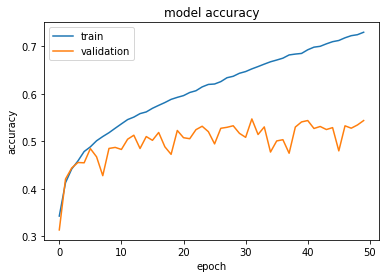

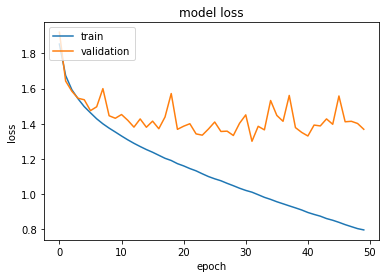

Learning Rate:  0.01
Training Accuracy:  0.7294800281524658
Validation Accuracy:  0.5436999797821045
Epoch 1/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.9543 - accuracy: 0.2954 - val_loss: 1.7610 - val_accuracy: 0.3597
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.7814 - accuracy: 0.3633 - val_loss: 2.0025 - val_accuracy: 0.3047
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.7208 - accuracy: 0.3861 - val_loss: 2.0792 - val_accuracy: 0.2994
Epoch 4/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6664 - accuracy: 0.4084 - val_loss: 1.7575 - val_accuracy: 0.3877
Epoch 5/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6221 - accuracy: 0.4250 - val_loss: 1.6857 - val_accuracy: 0.4011
Epoch 6/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5948 - accuracy: 0.4351 - val_loss: 1.7944 - val_accuracy: 0.3816
Epoch 7/50
1563/1563 [=

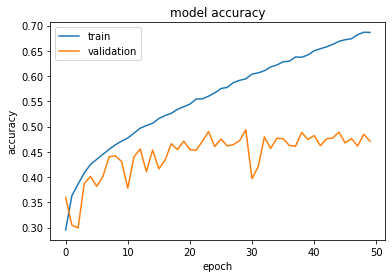

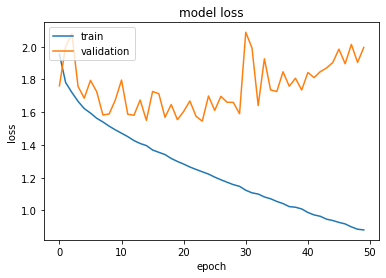

Learning Rate:  0.1
Training Accuracy:  0.6864399909973145
Validation Accuracy:  0.4708999991416931


In [3]:
def evaluate_model_lr(lr):
    # Create the neural network
    model = Sequential()
    model.add(Dense(1024, input_shape = (3072, ), activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))

    # Create our optimizer
    sgd = SGD(lr = lr)

    # 'Compile' the network to associate it with a loss function,
    # an optimizer, and what metrics we want to track
    model.compile(
        loss='categorical_crossentropy', 
        optimizer=sgd, 
        metrics = 'accuracy'
    )
    history = model.fit(
        train_x, train_y, 
        shuffle = True, 
        epochs = 50, 
        validation_data = (test_x, test_y), 
        verbose = True
    )

    
    plot_history(history)

    print("Learning Rate: ", lr)
    print("Training Accuracy: ", history.history['accuracy'][-1])
    print("Validation Accuracy: ", history.history['val_accuracy'][-1])
    
lrs = [0.001, 0.01, 0.1]
for lr in lrs:
    evaluate_model_lr(lr=lr)

Epoch 1/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.8500 - accuracy: 0.3421 - val_loss: 1.7398 - val_accuracy: 0.3736
Epoch 2/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6705 - accuracy: 0.4147 - val_loss: 1.6496 - val_accuracy: 0.4148
Epoch 3/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5939 - accuracy: 0.4414 - val_loss: 1.5719 - val_accuracy: 0.4475
Epoch 4/50
1563/1563 [==============================] - 16s 11ms/step - loss: 1.5399 - accuracy: 0.4601 - val_loss: 1.5529 - val_accuracy: 0.4456
Epoch 5/50
1563/1563 [==============================] - 16s 11ms/step - loss: 1.4983 - accuracy: 0.4752 - val_loss: 1.5625 - val_accuracy: 0.4512
Epoch 6/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4611 - accuracy: 0.4905 - val_loss: 1.4846 - val_accuracy: 0.4695
Epoch 7/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4289 - accuracy: 0.5012 - val_loss: 1.4648 -

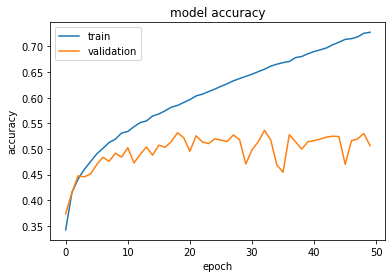

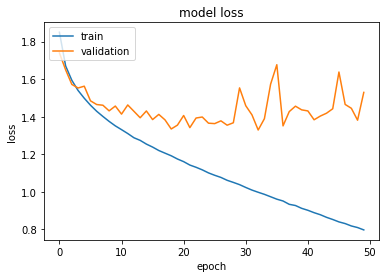

Momentum:  0.001
Training Accuracy:  0.7277200222015381
Validation Accuracy:  0.5063999891281128
Epoch 1/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.8518 - accuracy: 0.3417 - val_loss: 1.7219 - val_accuracy: 0.3860
Epoch 2/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6726 - accuracy: 0.4121 - val_loss: 1.6558 - val_accuracy: 0.4189
Epoch 3/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5956 - accuracy: 0.4410 - val_loss: 1.6140 - val_accuracy: 0.4183
Epoch 4/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5406 - accuracy: 0.4607 - val_loss: 1.5953 - val_accuracy: 0.4356
Epoch 5/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5004 - accuracy: 0.4754 - val_loss: 1.5185 - val_accuracy: 0.4568
Epoch 6/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4632 - accuracy: 0.4877 - val_loss: 1.5461 - val_accuracy: 0.4528
Epoch 7/50
1563/1563 [=====

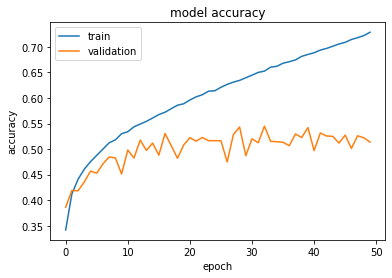

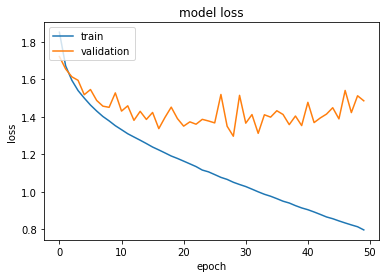

Momentum:  0.01
Training Accuracy:  0.7287399768829346
Validation Accuracy:  0.5135999917984009
Epoch 1/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.8501 - accuracy: 0.3422 - val_loss: 1.7084 - val_accuracy: 0.4043
Epoch 2/50
1563/1563 [==============================] - 28s 18ms/step - loss: 1.6650 - accuracy: 0.4145 - val_loss: 1.6312 - val_accuracy: 0.4140
Epoch 3/50
1563/1563 [==============================] - 60s 38ms/step - loss: 1.5861 - accuracy: 0.4445 - val_loss: 1.6082 - val_accuracy: 0.4234
Epoch 4/50
1563/1563 [==============================] - 60s 39ms/step - loss: 1.5330 - accuracy: 0.4632 - val_loss: 1.5962 - val_accuracy: 0.4291
Epoch 5/50
1563/1563 [==============================] - 59s 38ms/step - loss: 1.4898 - accuracy: 0.4798 - val_loss: 1.5261 - val_accuracy: 0.4510
Epoch 6/50
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4531 - accuracy: 0.4915 - val_loss: 1.5014 - val_accuracy: 0.4670
Epoch 7/50
1563/1563 [======

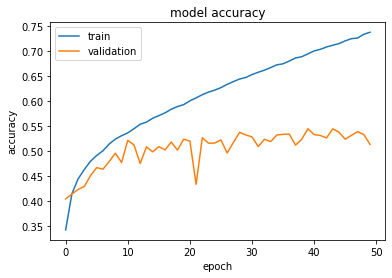

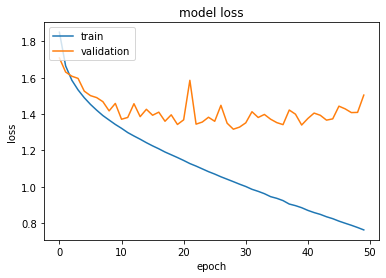

Momentum:  0.1
Training Accuracy:  0.738319993019104
Validation Accuracy:  0.5135999917984009
Epoch 1/50
1563/1563 [==============================] - 59s 38ms/step - loss: 2.4764 - accuracy: 0.1214 - val_loss: 2.4407 - val_accuracy: 0.1000
Epoch 2/50
1563/1563 [==============================] - 59s 38ms/step - loss: 2.5633 - accuracy: 0.0999 - val_loss: 2.5067 - val_accuracy: 0.1003
Epoch 3/50
1563/1563 [==============================] - 59s 38ms/step - loss: 2.6176 - accuracy: 0.1005 - val_loss: 2.8498 - val_accuracy: 0.1000
Epoch 4/50
1563/1563 [==============================] - 17s 11ms/step - loss: 2.6524 - accuracy: 0.1006 - val_loss: 3.0225 - val_accuracy: 0.1000
Epoch 5/50
1563/1563 [==============================] - 17s 11ms/step - loss: 2.6164 - accuracy: 0.1011 - val_loss: 3.3505 - val_accuracy: 0.1000
Epoch 6/50
1563/1563 [==============================] - 17s 11ms/step - loss: 2.7032 - accuracy: 0.0998 - val_loss: 3.4311 - val_accuracy: 0.1000
Epoch 7/50
1563/1563 [========

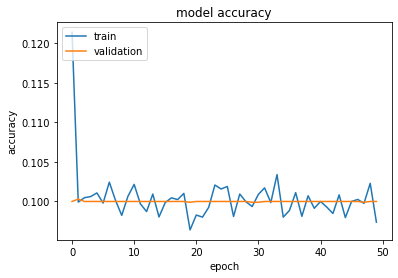

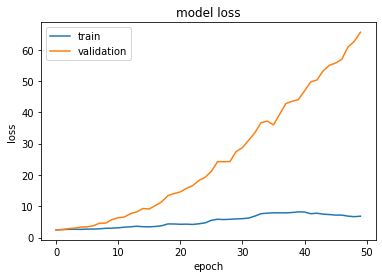

Momentum:  1.0
Training Accuracy:  0.09737999737262726
Validation Accuracy:  0.10000000149011612


In [4]:
def evaluate_model_m(m):
    # Create the neural network
    model = Sequential()
    model.add(Dense(1024, input_shape = (3072, ), activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))

    # Create our optimizer
    sgd = SGD(lr = 0.01, momentum=m)

    # 'Compile' the network to associate it with a loss function,
    # an optimizer, and what metrics we want to track
    model.compile(
        loss='categorical_crossentropy', 
        optimizer=sgd, 
        metrics = 'accuracy'
    )
    history = model.fit(
        train_x, train_y, 
        shuffle = True, 
        epochs = 50, 
        validation_data = (test_x, test_y), 
        verbose = True
    )

    
    plot_history(history)

    print("Momentum: ", m)
    print("Training Accuracy: ", history.history['accuracy'][-1])
    print("Validation Accuracy: ", history.history['val_accuracy'][-1])
    
ms = [0.001, 0.01, 0.1, 1.0]
for m in ms:
    evaluate_model_m(m=m)

Epoch 1/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.8398 - accuracy: 0.3446 - val_loss: 1.7297 - val_accuracy: 0.3756
Epoch 2/50
1563/1563 [==============================] - 18s 11ms/step - loss: 1.6638 - accuracy: 0.4167 - val_loss: 1.6518 - val_accuracy: 0.4106
Epoch 3/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5855 - accuracy: 0.4444 - val_loss: 1.6486 - val_accuracy: 0.3950
Epoch 4/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5313 - accuracy: 0.4640 - val_loss: 1.5482 - val_accuracy: 0.4521
Epoch 5/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.4890 - accuracy: 0.4798 - val_loss: 1.5842 - val_accuracy: 0.4345
Epoch 6/50
1563/1563 [==============================] - 60s 39ms/step - loss: 1.4514 - accuracy: 0.4911 - val_loss: 1.4821 - val_accuracy: 0.4780
Epoch 7/50
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4206 - accuracy: 0.5050 - val_loss: 1.4607 -

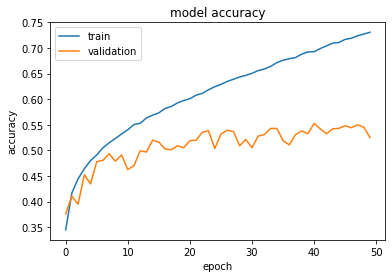

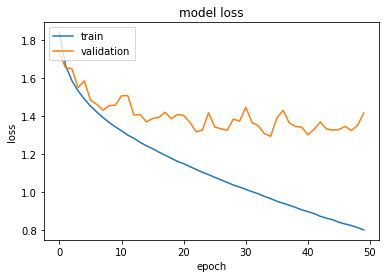

Decay:  1e-05
Training Accuracy:  0.7307999730110168
Validation Accuracy:  0.5249000191688538
Epoch 1/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.8429 - accuracy: 0.3457 - val_loss: 1.7103 - val_accuracy: 0.3882
Epoch 2/50
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6675 - accuracy: 0.4175 - val_loss: 1.6865 - val_accuracy: 0.3989
Epoch 3/50
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5916 - accuracy: 0.4424 - val_loss: 1.6023 - val_accuracy: 0.4328
Epoch 4/50
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5402 - accuracy: 0.4616 - val_loss: 1.5594 - val_accuracy: 0.4454
Epoch 5/50
1563/1563 [==============================] - 40s 25ms/step - loss: 1.5017 - accuracy: 0.4781 - val_loss: 1.5337 - val_accuracy: 0.4560
Epoch 6/50
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4690 - accuracy: 0.4895 - val_loss: 1.4945 - val_accuracy: 0.4757
Epoch 7/50
1563/1563 [========

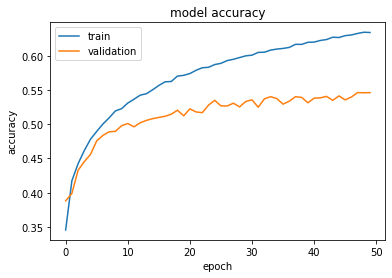

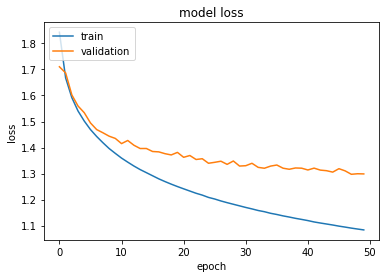

Decay:  0.0001
Training Accuracy:  0.6338800191879272
Validation Accuracy:  0.5461000204086304
Epoch 1/50
1563/1563 [==============================] - 54s 34ms/step - loss: 1.8465 - accuracy: 0.3484 - val_loss: 1.7609 - val_accuracy: 0.3787
Epoch 2/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.7007 - accuracy: 0.4098 - val_loss: 1.6769 - val_accuracy: 0.4155
Epoch 3/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6535 - accuracy: 0.4273 - val_loss: 1.6495 - val_accuracy: 0.4294
Epoch 4/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6260 - accuracy: 0.4394 - val_loss: 1.6288 - val_accuracy: 0.4332
Epoch 5/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6058 - accuracy: 0.4474 - val_loss: 1.6130 - val_accuracy: 0.4385
Epoch 6/50
1563/1563 [==============================] - 59s 38ms/step - loss: 1.5915 - accuracy: 0.4539 - val_loss: 1.6035 - val_accuracy: 0.4445
Epoch 7/50
1563/1563 [=======

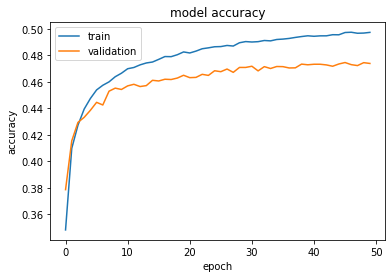

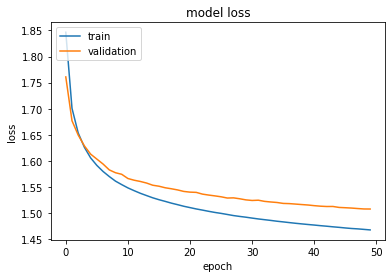

Decay:  0.001
Training Accuracy:  0.4972200095653534
Validation Accuracy:  0.47380000352859497
Epoch 1/50
1563/1563 [==============================] - 18s 11ms/step - loss: 1.9123 - accuracy: 0.3283 - val_loss: 1.8473 - val_accuracy: 0.3588
Epoch 2/50
1563/1563 [==============================] - 18s 12ms/step - loss: 1.8306 - accuracy: 0.3687 - val_loss: 1.8261 - val_accuracy: 0.3641
Epoch 3/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.8129 - accuracy: 0.3756 - val_loss: 1.8127 - val_accuracy: 0.3773
Epoch 4/50
1563/1563 [==============================] - 61s 39ms/step - loss: 1.8026 - accuracy: 0.3791 - val_loss: 1.8045 - val_accuracy: 0.3774
Epoch 5/50
1563/1563 [==============================] - 60s 39ms/step - loss: 1.7956 - accuracy: 0.3830 - val_loss: 1.7986 - val_accuracy: 0.3776
Epoch 6/50
1563/1563 [==============================] - 60s 39ms/step - loss: 1.7904 - accuracy: 0.3836 - val_loss: 1.7947 - val_accuracy: 0.3833
Epoch 7/50
1563/1563 [=======

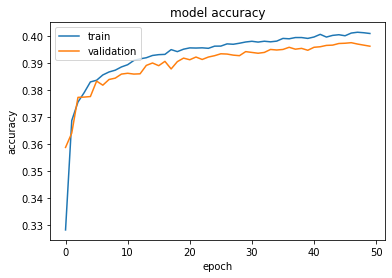

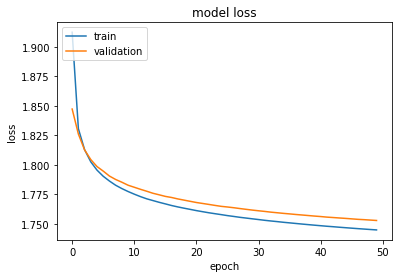

Decay:  0.01
Training Accuracy:  0.4009000062942505
Validation Accuracy:  0.3962000012397766


In [5]:
def evaluate_model_d(d):
    # Create the neural network
    model = Sequential()
    model.add(Dense(1024, input_shape = (3072, ), activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))

    # Create our optimizer
    sgd = SGD(lr = 0.01, momentum=0.1, decay=d)

    # 'Compile' the network to associate it with a loss function,
    # an optimizer, and what metrics we want to track
    model.compile(
        loss='categorical_crossentropy', 
        optimizer=sgd, 
        metrics = 'accuracy'
    )
    history = model.fit(
        train_x, train_y, 
        shuffle = True, 
        epochs = 50, 
        validation_data = (test_x, test_y), 
        verbose = True
    )

    
    plot_history(history)

    print("Decay: ", d)
    print("Training Accuracy: ", history.history['accuracy'][-1])
    print("Validation Accuracy: ", history.history['val_accuracy'][-1])
    

ds = [0.00001, 0.0001, 0.001, 0.01]
for d in ds:
    evaluate_model_d(d=d)

In [6]:
""" 
Write your code to build an MLP with one hidden layer of 1024 neurons,
with an SGD optimizer. Train for 50 epochs, and output the training and
validation accuracy at each epoch.
"""

def evaluate_model():
    # Create the neural network
    model = Sequential()
    model.add(Dense(1024, input_shape = (3072, ), activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))

    # Create our optimizer
    sgd = SGD(lr = 0.01, momentum=0.1, decay=0.0001)

    # 'Compile' the network to associate it with a loss function,
    # an optimizer, and what metrics we want to track
    model.compile(
        loss='categorical_crossentropy', 
        optimizer=sgd, 
        metrics = 'accuracy'
    )
    history = model.fit(
        train_x, train_y, 
        shuffle = True, 
        epochs = 50, 
        validation_data = (test_x, test_y), 
        verbose = True
    )

    
    plot_history(history)

    print("Training Accuracy: ", history.history['accuracy'][-1])
    print("Validation Accuracy: ", history.history['val_accuracy'][-1])

Epoch 1/50
1563/1563 [==============================] - 60s 38ms/step - loss: 1.8421 - accuracy: 0.3458 - val_loss: 1.7327 - val_accuracy: 0.3859
Epoch 2/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.6625 - accuracy: 0.4175 - val_loss: 1.6529 - val_accuracy: 0.4213
Epoch 3/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5864 - accuracy: 0.4465 - val_loss: 1.6338 - val_accuracy: 0.4253
Epoch 4/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5360 - accuracy: 0.4632 - val_loss: 1.5572 - val_accuracy: 0.4565
Epoch 5/50
1563/1563 [==============================] - 18s 12ms/step - loss: 1.4973 - accuracy: 0.4783 - val_loss: 1.5350 - val_accuracy: 0.4580
Epoch 6/50
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4653 - accuracy: 0.4911 - val_loss: 1.4829 - val_accuracy: 0.4820
Epoch 7/50
1563/1563 [==============================] - 60s 39ms/step - loss: 1.4365 - accuracy: 0.5019 - val_loss: 1.5297 -

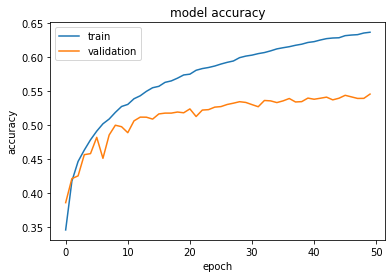

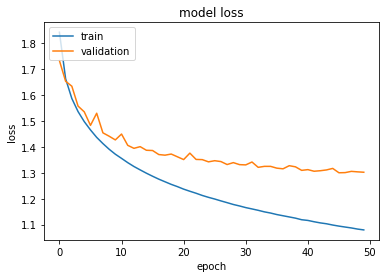

Training Accuracy:  0.6365600228309631
Validation Accuracy:  0.5455999970436096


In [7]:
evaluate_model() # Question 2

#### Question 2

Complete the following table on the design choices for your MLP 
(3 MARKS):

| Hyperparameter       | What I used | Why?                  |
|:---------------------|:------------|:----------------------|
| Optimizer            | SGD | Specified in question |
| # of hidden layers   | 1 | Specified in question |
| # of hidden neurons  | 1024 | Specified in question |
| Hid layer activation | relu | Relu is more computationally efficient. |
| # of output neurons  | 10 | Dataset contains observations belonging to 10 classes. |
| Output activation    | softmax | Obtained probability in each class  |
| lr                   | 0.01 | The model is trained on a range of learning rates, and a slightly overfitted model is chosen as the issue of overfitting might be reduce with momentum and decay. |
| momentum             | 0.1 | The model is trained on a range of momentum, and the model that is not overfitted and produces a training and validation losses with least oscillations is chosen. |
| decay                | 0.0001 | Test on a range of decay to find 0.1 the best     |
| loss                 | categorical_crossentropy | Model is a multiclass one          |

*For TA: ___ / 3* <br>
*Code:  ____/ 5* <br>
**TOTAL: ____ / 8** <br>

#### Question 3:

What was your final training accuracy? Validation accuracy? Is there overfitting / underfitting? Explain your answer (5 MARKS)

***PLACE YOUR ANSWER HERE ***

*FOR GRADER: ______ / 5*

### 3.3 Experimenting with the MLP

Cut and paste your code from Section 3.2 to the box below (you may need to rename your MLP). Experiment with the number of hidden layers, the number of neurons in each hidden layer, the optimization algorithm, etc. See [Keras Optimizers](https://keras.io/optimizers) for the types of optimizers and their parameters. **Train for 100 epochs.**


Epoch 1/50
1563/1563 [==============================] - 54s 35ms/step - loss: 2.2061 - accuracy: 0.2963 - val_loss: 1.6912 - val_accuracy: 0.4162
Epoch 2/50
1563/1563 [==============================] - 54s 35ms/step - loss: 1.9040 - accuracy: 0.3614 - val_loss: 1.5869 - val_accuracy: 0.4479
Epoch 3/50
1563/1563 [==============================] - 53s 34ms/step - loss: 1.7926 - accuracy: 0.3900 - val_loss: 1.5382 - val_accuracy: 0.4606
Epoch 4/50
1563/1563 [==============================] - 54s 34ms/step - loss: 1.7133 - accuracy: 0.4104 - val_loss: 1.4871 - val_accuracy: 0.4764
Epoch 5/50
1563/1563 [==============================] - 53s 34ms/step - loss: 1.6553 - accuracy: 0.4266 - val_loss: 1.4747 - val_accuracy: 0.4795
Epoch 6/50
1563/1563 [==============================] - 54s 35ms/step - loss: 1.6101 - accuracy: 0.4386 - val_loss: 1.4654 - val_accuracy: 0.4800
Epoch 7/50
1563/1563 [==============================] - 53s 34ms/step - loss: 1.5749 - accuracy: 0.4478 - val_loss: 1.4333 -

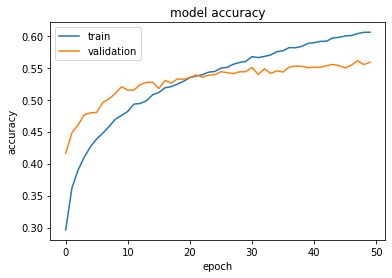

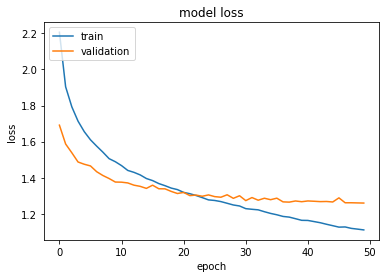

Learning Rate:  0.001
Training Accuracy:  0.605459988117218
Validation Accuracy:  0.5584999918937683
Epoch 1/50
1563/1563 [==============================] - 54s 35ms/step - loss: 1.9193 - accuracy: 0.3457 - val_loss: 1.6032 - val_accuracy: 0.4278
Epoch 2/50
1563/1563 [==============================] - 54s 35ms/step - loss: 1.6483 - accuracy: 0.4185 - val_loss: 1.5205 - val_accuracy: 0.4644
Epoch 3/50
1563/1563 [==============================] - 54s 35ms/step - loss: 1.5660 - accuracy: 0.4424 - val_loss: 1.5245 - val_accuracy: 0.4498
Epoch 4/50
1563/1563 [==============================] - 54s 35ms/step - loss: 1.5216 - accuracy: 0.4590 - val_loss: 1.5136 - val_accuracy: 0.4641
Epoch 5/50
1563/1563 [==============================] - 54s 34ms/step - loss: 1.5068 - accuracy: 0.4643 - val_loss: 1.5558 - val_accuracy: 0.4477
Epoch 6/50
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4938 - accuracy: 0.4660 - val_loss: 1.4594 - val_accuracy: 0.4780
Epoch 7/50
1563/1563 [=

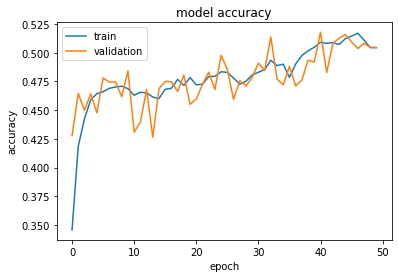

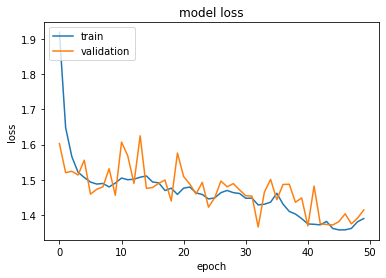

Learning Rate:  0.01
Training Accuracy:  0.5045400261878967
Validation Accuracy:  0.5042999982833862
Epoch 1/50
1563/1563 [==============================] - 150s 96ms/step - loss: 2.1826 - accuracy: 0.3102 - val_loss: 1.8938 - val_accuracy: 0.3646
Epoch 2/50
1563/1563 [==============================] - 120s 76ms/step - loss: 1.7675 - accuracy: 0.3828 - val_loss: 1.8975 - val_accuracy: 0.3467
Epoch 3/50
1563/1563 [==============================] - 77s 49ms/step - loss: 1.6632 - accuracy: 0.4107 - val_loss: 1.6291 - val_accuracy: 0.4258
Epoch 4/50
1563/1563 [==============================] - 182s 116ms/step - loss: 1.6120 - accuracy: 0.4254 - val_loss: 1.6011 - val_accuracy: 0.4276
Epoch 5/50
1563/1563 [==============================] - 65s 42ms/step - loss: 1.5903 - accuracy: 0.4311 - val_loss: 1.5529 - val_accuracy: 0.4489
Epoch 6/50
1563/1563 [==============================] - 135s 86ms/step - loss: 1.5809 - accuracy: 0.4355 - val_loss: 1.6141 - val_accuracy: 0.4201
Epoch 7/50
1563/15

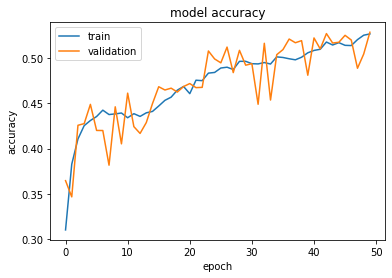

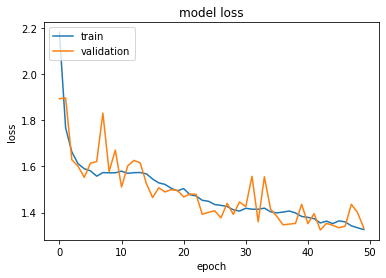

Learning Rate:  0.1
Training Accuracy:  0.5267599821090698
Validation Accuracy:  0.5285999774932861


In [3]:
def evaluate_model_lr(lr):
    # Create the neural network
    model = Sequential()
    model.add(Dense(2048, input_shape = (3072, ), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(1024, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(512,activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(10, activation = 'softmax'))

    # Create our optimizer
    sgd = SGD(lr = lr)

    # 'Compile' the network to associate it with a loss function,
    # an optimizer, and what metrics we want to track
    model.compile(
        loss='categorical_crossentropy', 
        optimizer=sgd, 
        metrics = 'accuracy'
    )
    history = model.fit(
        train_x, train_y, 
        shuffle = True, 
        epochs = 50, 
        validation_data = (test_x, test_y), 
        verbose = True
    )

    
    plot_history(history)

    print("Learning Rate: ", lr)
    print("Training Accuracy: ", history.history['accuracy'][-1])
    print("Validation Accuracy: ", history.history['val_accuracy'][-1])
    
lrs = [0.001, 0.01, 0.1]
for lr in lrs:
    evaluate_model_lr(lr=lr)

Epoch 1/50
1563/1563 [==============================] - 60s 38ms/step - loss: 2.2086 - accuracy: 0.2959 - val_loss: 1.7106 - val_accuracy: 0.4150
Epoch 2/50
1563/1563 [==============================] - 61s 39ms/step - loss: 1.9046 - accuracy: 0.3619 - val_loss: 1.5973 - val_accuracy: 0.4446
Epoch 3/50
1563/1563 [==============================] - 92s 59ms/step - loss: 1.7844 - accuracy: 0.3906 - val_loss: 1.5409 - val_accuracy: 0.4588
Epoch 4/50
1563/1563 [==============================] - 61s 39ms/step - loss: 1.7169 - accuracy: 0.4091 - val_loss: 1.5092 - val_accuracy: 0.4733
Epoch 5/50
1563/1563 [==============================] - 161s 103ms/step - loss: 1.6568 - accuracy: 0.4227 - val_loss: 1.4641 - val_accuracy: 0.4880
Epoch 6/50
1563/1563 [==============================] - 116s 74ms/step - loss: 1.6155 - accuracy: 0.4370 - val_loss: 1.4473 - val_accuracy: 0.4902
Epoch 7/50
1563/1563 [==============================] - 132s 84ms/step - loss: 1.5740 - accuracy: 0.4475 - val_loss: 1.44

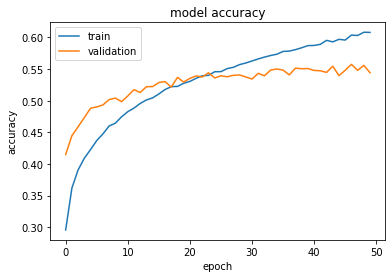

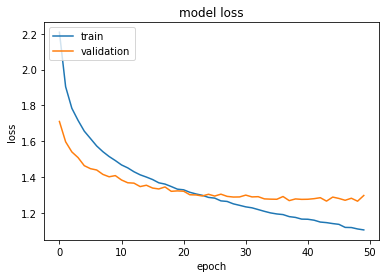

Momentum:  0.001
Training Accuracy:  0.6078799962997437
Validation Accuracy:  0.5442000031471252
Epoch 1/50
1563/1563 [==============================] - 184s 118ms/step - loss: 2.1935 - accuracy: 0.2991 - val_loss: 1.7097 - val_accuracy: 0.4129
Epoch 2/50
1563/1563 [==============================] - 62s 40ms/step - loss: 1.8923 - accuracy: 0.3634 - val_loss: 1.5888 - val_accuracy: 0.4438
Epoch 3/50
1563/1563 [==============================] - 200s 128ms/step - loss: 1.7854 - accuracy: 0.3870 - val_loss: 1.5365 - val_accuracy: 0.4609
Epoch 4/50
1563/1563 [==============================] - 81s 52ms/step - loss: 1.7096 - accuracy: 0.4085 - val_loss: 1.5090 - val_accuracy: 0.4687
Epoch 5/50
1563/1563 [==============================] - 166s 106ms/step - loss: 1.6511 - accuracy: 0.4243 - val_loss: 1.4678 - val_accuracy: 0.4812
Epoch 6/50
1563/1563 [==============================] - 118s 75ms/step - loss: 1.6099 - accuracy: 0.4355 - val_loss: 1.4531 - val_accuracy: 0.4867
Epoch 7/50
1563/1563

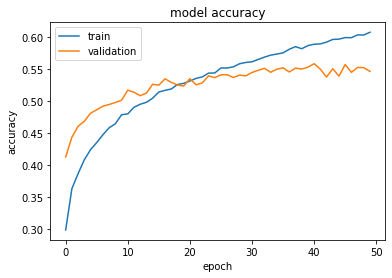

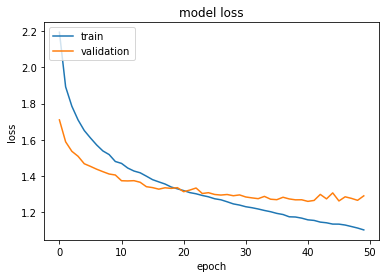

Momentum:  0.01
Training Accuracy:  0.6077200174331665
Validation Accuracy:  0.5465999841690063
Epoch 1/50
1563/1563 [==============================] - 204s 130ms/step - loss: 2.1928 - accuracy: 0.2973 - val_loss: 1.6774 - val_accuracy: 0.4091
Epoch 2/50
1563/1563 [==============================] - 78s 50ms/step - loss: 1.8872 - accuracy: 0.3629 - val_loss: 1.5913 - val_accuracy: 0.4447
Epoch 3/50
1563/1563 [==============================] - 169s 108ms/step - loss: 1.7725 - accuracy: 0.3935 - val_loss: 1.5160 - val_accuracy: 0.4700
Epoch 4/50
1563/1563 [==============================] - 115s 74ms/step - loss: 1.6925 - accuracy: 0.4144 - val_loss: 1.4907 - val_accuracy: 0.4775
Epoch 5/50
1563/1563 [==============================] - 133s 85ms/step - loss: 1.6419 - accuracy: 0.4298 - val_loss: 1.4643 - val_accuracy: 0.4841
Epoch 6/50
1563/1563 [==============================] - 152s 97ms/step - loss: 1.5934 - accuracy: 0.4405 - val_loss: 1.4379 - val_accuracy: 0.4928
Epoch 7/50
1563/1563 

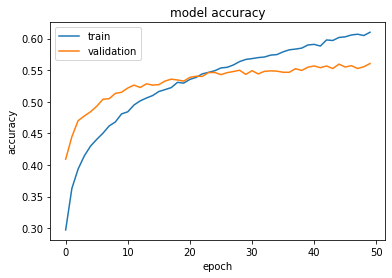

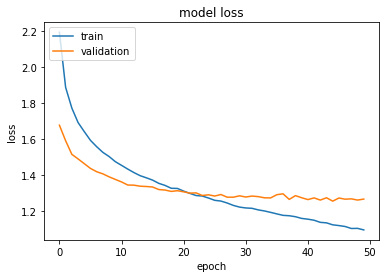

Momentum:  0.1
Training Accuracy:  0.6098999977111816
Validation Accuracy:  0.5604000091552734
Epoch 1/50
1563/1563 [==============================] - 206s 132ms/step - loss: 3.9815 - accuracy: 0.1907 - val_loss: 6.0678 - val_accuracy: 0.2041
Epoch 2/50
1563/1563 [==============================] - 71s 45ms/step - loss: 8.2576 - accuracy: 0.1911 - val_loss: 8.9958 - val_accuracy: 0.2032
Epoch 3/50
1563/1563 [==============================] - 169s 108ms/step - loss: 19.5790 - accuracy: 0.1846 - val_loss: 86.9647 - val_accuracy: 0.1604
Epoch 4/50
1563/1563 [==============================] - 114s 73ms/step - loss: 53.4576 - accuracy: 0.1406 - val_loss: 11506923.0000 - val_accuracy: 0.1565
Epoch 5/50
1563/1563 [==============================] - 127s 81ms/step - loss: 147.3141 - accuracy: 0.1437 - val_loss: 204468144.0000 - val_accuracy: 0.1592
Epoch 6/50
1563/1563 [==============================] - 156s 100ms/step - loss: 330.9388 - accuracy: 0.1518 - val_loss: 17446471680.0000 - val_accura

1563/1563 [==============================] - 60s 39ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000


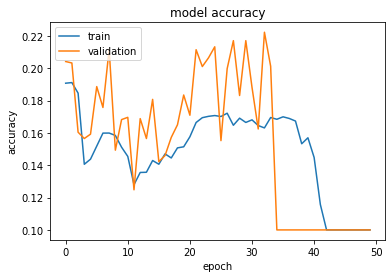

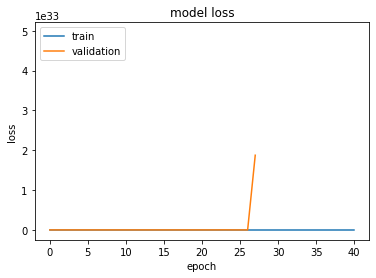

Momentum:  1.0
Training Accuracy:  0.10000000149011612
Validation Accuracy:  0.10000000149011612


In [4]:
def evaluate_model_m(m):
    # Create the neural network
    model = Sequential()
    model.add(Dense(2048, input_shape = (3072, ), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(1024, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(512,activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(10, activation = 'softmax'))

    # Create our optimizer
    sgd = SGD(lr = 0.001, momentum=m)

    # 'Compile' the network to associate it with a loss function,
    # an optimizer, and what metrics we want to track
    model.compile(
        loss='categorical_crossentropy', 
        optimizer=sgd, 
        metrics = 'accuracy'
    )
    history = model.fit(
        train_x, train_y, 
        shuffle = True, 
        epochs = 50, 
        validation_data = (test_x, test_y), 
        verbose = True
    )

    
    plot_history(history)

    print("Momentum: ", m)
    print("Training Accuracy: ", history.history['accuracy'][-1])
    print("Validation Accuracy: ", history.history['val_accuracy'][-1])
    
ms = [0.001, 0.01, 0.1, 1.0]
for m in ms:
    evaluate_model_m(m=m)

In [ ]:
"""
Cut and paste your code from Section 3.2 below, then modify it to get
much better results than what you had earlier. E.g. increase the number of
nodes in the hidden layer, increase the number of hidden layers,
change the optimizer, etc. 

Train for 100 epochs.

"""
def buildmodel(model_name):
    # Create the neural network
    model = Sequential()
    model.add(Dense(2048, input_shape = (3072, ), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(1024, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(512,activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(10, activation = 'softmax'))

    sgd = SGD(lr = 0.1, momentum=0.01)

    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = 'accuracy')
    return model

In [ ]:
def train(model, train_x, train_y, epochs, test_x, test_y, model_name):
    print("Starting training.")
    history = model.fit(x=train_x, y=train_y, batch_size=32, validation_data=(test_x, test_y), verbose=True, epochs=epochs)
    plot_history(history)
    print("Done. Now evaluating.")
    
    loss, acc = model.evaluate(x=test_x, y=test_y)
    print("Test accuracy: %3.2f, loss: %3.2f"%(acc, loss))

In [ ]:
MODEL_NAME = 'cifar-mlp.hd5'
(train_x, train_y), (test_x, test_y) = load_cifar10()
model = buildmodel(MODEL_NAME)
train(model, train_x, train_y, 100, test_x, test_y, MODEL_NAME)

In [ ]:
def train(model, train_x, train_y, epochs, test_x, test_y, model_name):
    savemodel = ModelCheckpoint(model_name)
    stopmodel = EarlyStopping(min_delta=0.001, patience=10)
    
    print("Starting training.")
    history = model.fit(x=train_x, y=train_y, batch_size=32, validation_data=(test_x, test_y), verbose=True, epochs=epochs, callbacks=[savemodel, stopmodel])
    plot_history(history)
    print("Done. Now evaluating.")
    
    loss, acc = model.evaluate(x=test_x, y=test_y)
    print("Test accuracy: %3.2f, loss: %3.2f"%(acc, loss))

In [ ]:
MODEL_NAME = 'cifar-mlp.hd5'
(train_x, train_y), (test_x, test_y) = load_cifar10()
model = buildmodel(MODEL_NAME)
train(model, train_x, train_y, 100, test_x, test_y, MODEL_NAME)

----

#### Question 4:

Complete the following table with your final design (you may add more rows for the # neurons (layer1) etc. to detail how many neurons you have in each hidden layer). Likewise you may replace the lr, momentum etc rows with parameters more appropriate to the optimizer that you have chosen. (3 MARKS)


| Hyperparameter       | What I used | Why?                  |
|:---------------------|:------------|:----------------------|
| Optimizer            |             |                       |
| # of hidden layers   |             |                       |
| # neurons(layer1)    |             |                       |
| Hid layer1 activation|             |                       |
| # neurons(layer2)    |             |                       |
| Hid layer2 activation|             |                       |
| # of output neurons  |             |                       |
| Output activation    |             |                       |
| lr                   |             |                       |
| momentum             |             |                       |
| decay                |             |                       |
| loss                 |             |                       |

*FOR GRADER: _____ / 3 * <br>
*CODE: ______ / 5 *<br>

***TOTAL: ______ / 8***

#### Question 5

What is the final training and validation accuracy that you obtained after 150 epochs. Is there considerable improvement over Section 3.2? Are there still signs of underfitting or overfitting? Explain your answer (5 MARKS)

***Write your answers here***

*FOR GRADER: ______ / 5 *

#### Question 6

Write a short reflection on the practical difficulties of using a dense MLP to classsify images in the CIFAR-10 datasets. (3 MARKS)

***Write your answers here***

*FOR GRADER: _______ /3*

----

## 4. Creating a CNN for the MNIST Data Set

In this section we will now create a convolutional neural network (CNN) to classify images in the MNIST dataset that we used in the previous lab. Let's go through each part to see how to do this.

### 4.1 Loading the MNIST Dataset

As always we will load the MNIST dataset, scale the inputs to between 0 and 1, and convert the Y labels to one-hot vectors. However unlike before we will not flatten the 28x28 image to a 784 element vector, since CNNs can inherently handle 2D data.

In [ ]:
def load_mnist():
    (train_x, train_y),(test_x, test_y) = mnist.load_data()
    train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
    test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)

    train_x=train_x.astype('float32')
    test_x = test_x.astype('float32')
    
    train_x /= 255.0
    test_x /= 255.0
        
    train_y = to_categorical(train_y, 10)
    test_y = to_categorical(test_y, 10)
        
    return (train_x, train_y), (test_x, test_y) 

### 4.2 Building the CNN

We will now build the CNN. Unlike before we will create a function to produce the CNN. We will also look at how to save and load Keras models using "checkpoints", particularly "ModelCheckpoint" that saves the model each epoch.

Let's begin by creating the model. We call os.path.exists to see if a model file exists, and call "load_model" if it does. Otherwise we create a new model.



In [ ]:
# load_model loads a model from a hd5 file.

MODEL_NAME = 'mnist-cnn.hd5'

if os.path.exists(MODEL_NAME) and os.path.isdir(MODEL_NAME):
    shutil.rmtree(MODEL_NAME)

def buildmodel(model_name):
    if os.path.exists(model_name):
        model = load_model(model_name)                                                                                             
    else:
        model = Sequential()
        model.add(Conv2D(32, kernel_size=(5,5),
        activation='relu',
        input_shape=(28, 28, 1), padding='same')) # Question 7

        model.add(MaxPooling2D(pool_size=(2,2), strides=2)) # Question 8
        model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
        model.add(Conv2D(128, kernel_size=(5,5), activation='relu'))
        model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2), strides=2))
        model.add(Flatten()) # Question 9
        model.add(Dense(1024, activation='relu'))
        model.add(Dropout(0.1))
        model.add(Dense(10, activation='softmax'))

    return model

----

#### Question 7

The first layer in our CNN is a 2D convolution kernel, shown here:

```
        model.add(Conv2D(32, kernel_size=(5,5),
        activation='relu',
        input_shape=(28, 28, 1), padding='same')) # Question 7
```

Why is the input_shape set to (28, 28, 1)? What does this mean? What does "padding = 'same'" mean? (4 MARKS)

***The images in minist dataset has dimension (28, 28, 1) and the model is taking the images directly of the shape (28, 28, 1). The dimensions of image is 28 by 28. The third value 1 indicates that the image does not have RGB values and is monotone. The hyperparameter "same" results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.***

*FOR GRADER: ______ / 4*

#### Question 8

The second layer is the MaxPooling2D layer shown below:

```
        model.add(MaxPooling2D(pool_size=(2,2), strides=2)) # Question 8
```

What other types of pooling layers are available? What does 'strides = 2' mean? (3 MARKS)

***The list of pooling layers can be found in this link https://keras.io/api/layers/pooling_layers/. The layers applicable for 2d are MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, and GlobalAveragePooling2D. The hyperparameter 'strides = 2' specifies that the pooling window moves 2 units for each pooling step.***

*FOR GRADER: _____ / 3*


#### Question 9

What does the "Flatten" layer here do? Why is it needed?

```
        model.add(Flatten()) # Question 9
```

***Flattening converts the data into a 1-dimensional array for inputting it to the next layer. This layer is necessary to reshape the output of the convolutional layers, flattens the data to create a single long feature vector to be used by the final dense layer for classification.***

*FOR GRADER: ____ / 2*




----

### 4.3 Training the CNN

Let's now train the CNN. In this example we introduce the idea of a "callback", which is a routine that Keras calls at the end of each epoch. Specifically we look at two callbacks:

    1. ModelCheckpoint: When called, Keras saves the model to the specified filename.
    
    2. EarlyStopping: When called, Keras checks if it should stop the training prematurely.
    

Let's look at the code to see how training is done, and how callbacks are used.

In [ ]:
def train(model, train_x, train_y, epochs, test_x, test_y, model_name):

    model.compile(optimizer=SGD(lr=0.01, momentum=0.7), 
                  loss='categorical_crossentropy', metrics=['accuracy'])

    savemodel = ModelCheckpoint(model_name)
    stopmodel = EarlyStopping(min_delta=0.001, patience=10) # Question 10

    print("Starting training.")

    model.fit(x=train_x, y=train_y, batch_size=32,
    validation_data=(test_x, test_y), shuffle=True,
    epochs=epochs, 
    callbacks=[savemodel, stopmodel])

    print("Done. Now evaluating.")
    loss, acc = model.evaluate(x=test_x, y=test_y)
    print("Test accuracy: %3.2f, loss: %3.2f"%(acc, loss))

Notice that there isn't very much that is unusual going on; we compile the model with our loss function and optimizer, then call fit, and finally evaluate to look at the final accuracy for the test set.  The only thing unusual is the "callbacks" parameter here in the fit function call

```
    model.fit(x=train_x, y=train_y, batch_size=32,
    validation_data=(test_x, test_y), shuffle=True,
    epochs=epochs, 
    callbacks=[savemodel, stopmodel])
```

----

#### Question 10.

What does do the min_delta and patience parameters do in the EarlyStopping callback, as shown below? (2 MARKS)

***The paramter min_delta is the minimum change in the monitored quantity to qualify as an improvement. For example, if the absolute change in the accuracy is less than min_delta then the model will count as no improvement. The parameter patience is the number of epochs with no improvement after which training will be stopped.***

```
    stopmodel = EarlyStopping(min_delta=0.001, patience=10) # Question 10
```

---

### 4.4 Putting it together.

Now let's run the code and see how it goes (Note: To save time we are training for only 5 epochs; we should train much longer to get much better results):

In [ ]:
(train_x, train_y),(test_x, test_y) = load_mnist()
model = buildmodel(MODEL_NAME)
train(model, train_x, train_y, 5, test_x, test_y, MODEL_NAME)

# ----

#### Question 11.

Compare the relative advantages and disadvantages of CNN vs. the Dense MLP that you build in sections 3.2 and 3.3. What makes CNNs better (or worse)? (3 MARKS)

***MLP is used to be applied in computer vision but is now succeded by CNN. The disadvantage of MLP is that MLP takes in flatten inputs of images and the spatial information of these images are lost. Another disadvantage of MLP is that MLP has fully connected layers and the paramters grows quickly. Training MLP is difficult as overfitting tends to occur and the model lose the ability to generalize. The advantage of MLP is that a light weight MLP can easily achieve high accuracy for dataset such as MNIST one. Another advantage of MLP is that MLP can be used as a baseline point of comparison to confirm that other models appear to perform better. The advantage of CNN is that the spatial information of input images is not lost as the images are input into the model without reshaping and flattening. Another advantage of CNN is that CNN can account for local connectivity because each filter is panned around the entire image according to certain size and stride, allowing the filter to find and match patterns no matter where the pattern is located in a given image.***

*FOR TA: ______ / 3*

## 5. Making a CNN for the CIFAR-10 Dataset

Now comes the fun part: Using the example above for creating a CNN for the MNIST dataset, now create a CNN in the box below for the MNIST-10 dataset. At the end of each epoch save the model to a file called "cifar.hd5" (note: the .hd5 is added automatically for you).

---

#### Question 12.

Summarize your design in the table below (the actual coding cell comes after this):

| Hyperparameter       | What I used | Why?                  |
|:---------------------|:------------|:----------------------|
| Optimizer            | Adam | Adam converges faster. Adam computes adaptive learning rates for each parameter that is tuned so less tuning to the learning rate are needed during training. |
| Input shape          | (32, 32, 3) | Images in the dataset have size 32 pixels by 32 pixels and RGB values per pixel. |
| First layer          | Conv2D | Conv2D layer is used to retain the spatial information of images as inputs to the model. |
| Second layer         | BatchNormalization | BatchNormalization is used to standardized outputs of previous layers. BatchNormalization can help to accelerate the training process of a neural network and can improve the performance of the model via a modest regularization effect. |
| Add more layers      | Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense | Layers of Conv2D and BatchNormalization are to create a deeper model to help the model learn the complex features. MaxPooling2D are down sampled or pooled feature maps that highlight the most present feature in the patch. Dropout is used to reduce overfitting. Flatten is to reshape the output of the convolutional layer for classification. Dense layers are added to help with classification and learn outputs from previous layers. |
| if needed            | Activation, Kernel Initializer, Kernel Regularizer | ELU is produce activations instead of letting them be zero when calculating the gradient, avoids the dead relu problem and produces negative outputs, which helps the network nudge weights and biases in the right directions. L2 regularizers reduce chances of overfitting. |
| Dense layer | Dense(256) and Dense(10) | The last layer uses Dense(10) to classify images to 10 categories and Dense(256) as second last layers to learn outputs from previous layer that gives better testing accuracy. |


*FOR TA:*
*Table: ________ / 3* <br>
*Code: _________/ 7* <br>
**TOTAL: _______ / 10** <br>

---

***TOTAL: _______ / 55***

In [ ]:
"""
Write your code for your CNN for the CIFAR-10 dataset here. 

Note: train_x, train_y, test_x, test_y were changed when we called 
load_mnist in the previous section. You will now need to call load_cifar10
again.

"""
MODEL_NAME = 'cifar.hd5'

if os.path.exists(MODEL_NAME) and os.path.isdir(MODEL_NAME):
    shutil.rmtree(MODEL_NAME)

def buildmodel(model_name):
    if os.path.exists(model_name):
        model = load_model(model_name)                                                                                             
    else:
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
        model.add(BatchNormalization())
        model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.2))

        model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.3))

        model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.4))

        model.add(Flatten())
        model.add(Dense(256, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        model.add(Dense(10, activation='softmax'))
        
        model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
    return model

In [ ]:
def train(model, train_x, train_y, epochs, test_x, test_y, model_name):
    savemodel = ModelCheckpoint(model_name)
    stopmodel = EarlyStopping(min_delta=0.001, patience=10)
    
    print("Starting training.")
    history = model.fit(x=train_x, y=train_y, batch_size=32, validation_data=(test_x, test_y), shuffle=True, epochs=epochs, callbacks=[savemodel, stopmodel])
    plot_history(history)
    print("Done. Now evaluating.")
    
    loss, acc = model.evaluate(x=test_x, y=test_y)
    print("Test accuracy: %3.2f, loss: %3.2f"%(acc, loss))

In [ ]:
def load_cifar10():
    (train_x, train_y), (test_x, test_y) = cifar10.load_data()
    train_x = train_x.reshape(train_x.shape[0], 32, 32, 3)
    test_x = test_x.reshape(test_x.shape[0], 32, 32, 3)
    train_x = train_x.astype('float32')
    test_x = test_x.astype('float32')
    train_x /= 255.0
    test_x /= 255.0
    ret_train_y = to_categorical(train_y,10)
    ret_test_y = to_categorical(test_y, 10)
    
    return (train_x, ret_train_y), (test_x, ret_test_y)


(train_x, train_y), (test_x, test_y) = load_cifar10()

In [ ]:
model = buildmodel(MODEL_NAME)
train(model, train_x, train_y, 100, test_x, test_y, MODEL_NAME)